In [17]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## INTRODUCTION

In this notebook we clean and transform the data, so it is easy to use for the modelling part.
The dataset used in this notebook is concerning wildfires with the intervention of Greek fire services between years 2013-2024. It includes basic information about the fires and about the resources used during the extuingishing. A brief overview of the actions taken in this notebook:

- data concatenation
- final data translation
- dropping irrelevant columns
- dropping rows with many missing values
- selecting only forest fire events
- encoding non-numerical columns
- feature engineering: creating several new columns

### Load data

In [18]:
import os

df1 = pd.read_excel('../../data/resources/gr/Dasikes_Pyrkagies_2013.xls')
df2 = pd.read_excel('../../data/resources/gr/Dasikes_Pyrkagies_2014.xls')
df3 = pd.read_excel('../../data/resources/gr/Dasikes_Pyrkagies_2015_v1.1.xls')
df4 = pd.read_excel('../../data/resources/gr/Dasikes_Pyrkagies_2016_v1.2.xlsx')
df5 = pd.read_excel('../../data/resources/gr/Dasikes_Pyrkagies_2017_v1.3.xlsx')
df6 = pd.read_excel('../../data/resources/gr/Dasikes_Pyrkagies_2018_v1.4.xlsx')
df7 = pd.read_excel('../../data/resources/gr//Dasikes_Pyrkagies_2019_v1.5.xlsx')
df8 = pd.read_excel('../../data/resources/gr/Dasikes_Pyrkagies_2020.xlsx')
df9 = pd.read_excel('../../data/resources/gr/Dasikes_Pyrkagies_2021.xlsx')
df10 = pd.read_excel('../../data/resources/gr/Dasikes_Pyrkagies_2022_v1.7a.xlsx')
df11 = pd.read_excel('../../data/resources/gr/Dasikes_Pyrkagies_2023_v1.8.xlsx')
df12 = pd.read_excel('../../data/resources/gr/Dasikes_Pyrkagies_2024.xls')

In [19]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

### Data concatenation

First we prepare the datasets for concatenation by unifying and translating the column names.

In [20]:
# for every df print the column names
for i, df in enumerate(dfs, start=1):
    print(f"df{i} columns:", df.columns)

df1 columns: Index(['Υπηρεσία', 'Νομός', 'Ημερ/νία Έναρξης', 'Ώρα Έναρξης',
       'Ημερ/νία Κατασβεσης', 'Ώρα Κατάσβεσης', 'Δασαρχείο', 'Δήμος',
       'Περιοχή', 'Διεύθυνση', 'Δάση', 'Δασική Έκταση', 'Άλση',
       'Χορτ/κές Εκτάσεις', 'Καλάμια - Βάλτοι', 'Γεωργικές Εκτάσεις',
       'Υπολλείματα Καλλιεργειών', 'Σκουπι-δότοποι', 'ΠΥΡΟΣ. ΣΩΜΑ',
       'ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ', 'ΕΘΕΛΟ-ΝΤΕΣ', 'ΣΤΡΑΤΟΣ', 'ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ',
       'ΠΥΡΟΣ. ΟΧΗΜ.', 'ΟΧΗΜ. ΟΤΑ', 'ΒΥΤΙΟ- ΦΟΡΑ', 'ΜΗΧΑΝΗ-ΜΑΤΑ',
       'ΕΛΙΚΟ- ΠΤΕΡΑ', 'Α/Φ CL415', 'Α/Φ CL215', 'Α/Φ PZL', 'Α/Φ GRU.'],
      dtype='object')
df2 columns: Index(['Υπηρεσία', 'Νομός', 'Ημερ/νία Έναρξης', 'Ώρα Έναρξης',
       'Ημερ/νία Κατασβεσης', 'Ώρα Κατάσβεσης', 'Δασαρχείο', 'Δήμος',
       'Περιοχή', 'Διεύθυνση', 'Δάση', 'Δασική Έκταση', 'Άλση',
       'Χορτ/κές Εκτάσεις', 'Καλάμια - Βάλτοι', 'Γεωργικές Εκτάσεις',
       'Υπολλείματα Καλλιεργειών', 'Σκουπι-δότοποι', 'ΠΥΡΟΣ. ΣΩΜΑ',
       'ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ', 'ΕΘΕΛΟ-ΝΤΕΣ', 'ΣΤΡΑΤΟΣ', 'ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ',
   

In [21]:
# Check and drop columns if they exist in each dataframe
columns_to_drop = ['Α/Α ΕΓΓΡΑΦΗΣ', 'Α/Α ENGAGE', 'X-ENGAGE', 'Y-ENGAGE', 'ΜΙΣΘ. ΕΛΙΚΟΠΤ.', 'ΜΙΣΘ. ΑΕΡΟΣΚ.']
dfs_drop = dfs.copy()  # Create a copy of the list to avoid modifying the original list during iteration

for i, df in enumerate(dfs_drop, start=1):
    existing_columns = [col for col in columns_to_drop if col in df.columns]
    if existing_columns:
        dfs_drop[i - 1] = df.drop(columns=existing_columns)

In [22]:
# count number of columns in each dataframe
for i, df in enumerate(dfs_drop, start=1):
    print(f"df{i} columns: {len(df.columns)}")

df1 columns: 32
df2 columns: 32
df3 columns: 32
df4 columns: 32
df5 columns: 32
df6 columns: 32
df7 columns: 32
df8 columns: 32
df9 columns: 32
df10 columns: 32
df11 columns: 32
df12 columns: 32


In [23]:
# rename the columns of every df with their english equivalent
dfs_rename = dfs_drop.copy()  
for i, df in enumerate(dfs_rename, start=1):
    df.rename(columns={
    'Υπηρεσία': 'Service',
    'Νομός': 'Region',
    'Ημερ/νία Έναρξης': 'Start Date',
    'Ώρα Έναρξης': 'Start Time',
    'Ημερ/νία Κατασβεσης': 'Extinguishing Date',
    'Ώρα Κατάσβεσης': 'Extinguishing Time',
    'Δασαρχείο': 'Forest Service',
    'Δήμος': 'Municipality',
    'Περιοχή': 'Area',
    'Διεύθυνση': 'Address',
    'Δάση': 'Forests',
    'Δασική Έκταση': 'Forest Area',
    'Άλση': 'Groves',
    'Χορτ/κές Εκτάσεις': 'Grasslands',
    'Καλάμια - Βάλτοι': 'Reeds and Swamps',
    'Γεωργικές Εκτάσεις': 'Agricultural Land',
    'Υπολλείματα Καλλιεργειών': 'Crop Residues',
    'Σκουπι-δότοποι': 'Landfills',
    'ΠΥΡΟΣ. ΣΩΜΑ': 'Fire Brigade',
    'ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ': 'Ground Units',
    'ΕΘΕΛΟ-ΝΤΕΣ': 'Volunteers',
    'ΣΤΡΑΤΟΣ': 'Army',
    'ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ': 'Other Forces',
    'ΠΥΡΟΣ. ΟΧΗΜ.': 'Fire Trucks',
    'ΟΧΗΜ. ΥΠΗΡΕΣΙΑΚΑ': 'Service Vehicles',
    'ΟΧΗΜ. ΟΤΑ': 'Municipal Vehicles',
    'ΒΥΤΙΟ- ΦΟΡΑ': 'Water Tankers',
    'ΜΗΧΑΝΗ-ΜΑΤΑ': 'Machinery',
    'ΕΛΙΚΟ- ΠΤΕΡΑ': 'Helicopters',
    'Α/Φ CL415': 'Aircraft CL415',
    'Α/Φ CL215': 'Aircraft CL215',
    'Α/Φ PZL': 'Aircraft PZL',
    'Α/Φ GRU.': 'Aircraft GRU'
    }, inplace=True)
    


In [24]:
# concatenate all dataframes
df = pd.concat(dfs_rename, ignore_index=True)
df.reset_index(drop=True, inplace=True)
df

,Service,Region,Start Date,Start Time,Extinguishing Date,Extinguishing Time,Forest Service,Municipality,Area,Address,...,Fire Trucks,Municipal Vehicles,Water Tankers,Machinery,Helicopters,Aircraft CL415,Aircraft CL215,Aircraft PZL,Aircraft GRU,Service Vehicles
0,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2013-04-01,12:20,2013-04-03,10:00,NaN,Δ. ΩΡΩΠΟΥ,ΜΑΡΚΟΠΟΥΛΟ ΩΡΩΠΟΥ,ΠΕΡΙΟΧΗ ΑΓ. ΓΕΩΡΓΙΟΣ,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2013-04-16,19:00,2013-04-16,20:40,NaN,Δ. ΑΧΑΡΝΩΝ,NaN,ΘΕΣΗ ΠΑΤΗΤΗΡΙΑ ΒΑΡΥΜΠΟΠΗ,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2013-05-31,19:00,2013-05-31,20:19,NaN,Δ. ΑΧΑΡΝΩΝ,ΑΧΑΡΝΑΙ,ΣΑΡΑΝΤΑ ΜΑΡΤΥΡΕΣ (ΛΟΦΟΣ),...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2013-05-31,19:19,2013-05-31,20:15,NaN,Δ. ΩΡΩΠΟΥ,ΚΑΠΑΝΔΡΙΤΙ,ΘΕΣΗ ΜΕΤΟΧΙ-ΡΙ,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2013-06-24,15:42,2013-06-24,21:10,NaN,Δ. ΔΙΟΝΥΣΟΥ,ΚΡΥΟΝΕΡΙ,ΥΔΡΑΓΩΓΕΙΟ ΚΡΥΟΝΕΡΙΟΥ,...,5.0,5.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112467,Π.Υ. ΖΑΚΥΝΘΟΥ,ΖΑΚΥΝΘΟΥ,2024-10-07,13:08,2024-10-07,14:25,NaN,Δ. ΖΑΚΥΝΘΟΥ,NaN,Τ.Κ.ΑΜΠΕΛΟΚΗΠΩΝ,...,3.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112468,Π.Υ. ΖΑΚΥΝΘΟΥ,ΖΑΚΥΝΘΟΥ,2024-10-26,20:18,2024-10-27,19:37,NaN,Δ. ΖΑΚΥΝΘΟΥ,NaN,Τ.Κ. ΚΟΙΛΙΩΜΕΝΟΥ,...,10.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112469,Π.Υ. ΖΑΚΥΝΘΟΥ,ΖΑΚΥΝΘΟΥ,2024-11-02,12:25,2024-11-25,13:49,NaN,Δ. ΖΑΚΥΝΘΟΥ,NaN,ΑΚΡΩΤΗΡΙ,...,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112470,Π.Κ. ΕΛΑΤΙΩΝ,ΖΑΚΥΝΘΟΥ,2024-02-01,20:15,2024-02-01,21:06,NaN,Δ. ΖΑΚΥΝΘΟΥ,ΑΝΩ ΒΟΛΙΜΕΣ,Τ.Κ. ΒΟΛΙΜΩΝ,...,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df.columns

Index(['Service', 'Region', 'Start Date', 'Start Time', 'Extinguishing Date',
       'Extinguishing Time', 'Forest Service', 'Municipality', 'Area',
       'Address', 'Forests', 'Forest Area', 'Groves', 'Grasslands',
       'Reeds and Swamps', 'Agricultural Land', 'Crop Residues', 'Landfills',
       'Fire Brigade', 'Ground Units', 'Volunteers', 'Army', 'Other Forces',
       'Fire Trucks', 'Municipal Vehicles', 'Water Tankers', 'Machinery',
       'Helicopters', 'Aircraft CL415', 'Aircraft CL215', 'Aircraft PZL',
       'Aircraft GRU', 'Service Vehicles'],
      dtype='object')

Merging the columns 'Service Vehicles' and 'Municipal Vehicles' as they are the same column, but they were mistakenly separated in the concatenation.

In [26]:
df['Municipal Vehicles'] = df[['Service Vehicles', 'Municipal Vehicles']].apply(
    lambda x: x[0] if pd.isna(x[1]) else (x[1] if pd.isna(x[0]) else x[0] + x[1]), axis=1
)
df.drop(columns=['Service Vehicles'], inplace=True)

C:\Users\Zosia\AppData\Local\Temp\ipykernel_3508\1951712050.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x: x[0] if pd.isna(x[1]) else (x[1] if pd.isna(x[0]) else x[0] + x[1]), axis=1


### Handling missing values

In [27]:
# check for missing values
missing_values = df.isnull().sum()
missing_values

Service                   0
Region                    8
Start Date                0
Start Time                0
Extinguishing Date    23212
Extinguishing Time    23266
Forest Service        59587
Municipality              0
Area                  66430
Address                   0
Forests                   0
Forest Area               0
Groves                    0
Grasslands                0
Reeds and Swamps          0
Agricultural Land         0
Crop Residues             0
Landfills                 0
Fire Brigade            102
Ground Units             98
Volunteers               58
Army                     58
Other Forces             58
Fire Trucks              57
Municipal Vehicles       58
Water Tankers            58
Machinery                58
Helicopters              58
Aircraft CL415           58
Aircraft CL215           58
Aircraft PZL             58
Aircraft GRU             58
dtype: int64

In [28]:
# drop columns with many missing values
df.drop(columns=['Extinguishing Date', 'Extinguishing Time', 'Area', 'Forest Service'], inplace=True)

# drop rows with missing values
df.dropna(inplace=True)

Correct Region values

In [29]:
df['Region'].unique()

array(['ΑΤΤΙΚΗΣ', 'ΡΟΔΟΠΗΣ', 'ΚΑΒΑΛΑΣ', 'ΔΡΑΜΑΣ', 'ΞΑΝΘΗΣ', 'ΕΒΡΟΥ',
       'ΘΕΣΣΑΛΟΝΙΚΗΣ', 'ΣΕΡΡΩΝ', 'ΧΑΛΚΙΔΙΚΗΣ', 'ΚΙΛΚΙΣ', 'ΠΕΛΛΑΣ',
       'ΗΜΑΘΙΑΣ', 'ΠΙΕΡΙΑΣ', 'ΚΟΖΑΝΗΣ', 'ΦΛΩΡΙΝΑΣ', 'ΚΑΣΤΟΡΙΑΣ',
       'ΓΡΕΒΕΝΩΝ', 'ΙΩΑΝΝΙΝΩΝ', 'ΘΕΣΠΡΩΤΙΑΣ', 'ΑΡΤΑΣ', 'ΠΡΕΒΕΖΗΣ',
       'ΛΑΡΙΣΑΣ', 'ΜΑΓΝΗΣΙΑΣ', 'ΤΡΙΚΑΛΩΝ', 'ΚΑΡΔΙΤΣΑΣ', 'ΑΧΑΙΑΣ',
       'ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ', 'ΗΛΕΙΑΣ', 'ΑΡΚΑΔΙΑΣ', 'ΜΕΣΣΗΝΙΑΣ', 'ΛΑΚΩΝΙΑΣ',
       'ΑΡΓΟΛΙΔΟΣ', 'ΚΟΡΙΝΘΙΑΣ', 'ΦΘΙΩΤΙΔΑΣ', 'ΕΥΡΥΤΑΝΙΑΣ', 'ΦΩΚΙΔΟΣ',
       'ΒΟΙΩΤΙΑΣ', 'ΕΥΒΟΙΑΣ', 'ΚΥΚΛΑΔΩΝ', 'ΔΩΔΕΚΑΝΗΣΩΝ', 'ΛΕΣΒΟΥ', 'ΧΙΟΥ',
       'ΣΑΜΟΥ', 'ΗΡΑΚΛΕΙΟΥ', 'ΧΑΝΙΩΝ', 'ΡΕΘΥΜΝΟΥ', 'ΛΑΣΙΘΙΟΥ', 'ΚΕΡΚΥΡΑΣ',
       'ΛΕΥΚΑΔΟΣ', 'ΚΕΦΑΛΛΟΝΙΑΣ', 'ΖΑΚΥΝΘΟΥ', 'ΚΕΦΑΛΛΗΝΙΑΣ'], dtype=object)

In [30]:
# how many rows have value 'ΚΕΦΑΛΛΗΝΙΑΣ' in Region column
df[df['Region'] == 'ΚΕΦΑΛΛΗΝΙΑΣ'].shape[0]

244

In [31]:
# replace 'ΚΕΦΑΛΛΗΝΙΑΣ' with 'ΚΕΦΑΛΛΟΝΙΑΣ' in Region column
df['Region'] = df['Region'].replace('ΚΕΦΑΛΛΗΝΙΑΣ', 'ΚΕΦΑΛΛΟΝΙΑΣ')
df

,Service,Region,Start Date,Start Time,Municipality,Address,Forests,Forest Area,Groves,Grasslands,...,Other Forces,Fire Trucks,Municipal Vehicles,Water Tankers,Machinery,Helicopters,Aircraft CL415,Aircraft CL215,Aircraft PZL,Aircraft GRU
0,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2013-04-01,12:20,Δ. ΩΡΩΠΟΥ,ΠΕΡΙΟΧΗ ΑΓ. ΓΕΩΡΓΙΟΣ,0.00,20.0,0.0,0.00,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2013-04-16,19:00,Δ. ΑΧΑΡΝΩΝ,ΘΕΣΗ ΠΑΤΗΤΗΡΙΑ ΒΑΡΥΜΠΟΠΗ,0.10,0.0,0.0,0.00,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2013-05-31,19:00,Δ. ΑΧΑΡΝΩΝ,ΣΑΡΑΝΤΑ ΜΑΡΤΥΡΕΣ (ΛΟΦΟΣ),0.00,0.0,0.5,2.50,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2013-05-31,19:19,Δ. ΩΡΩΠΟΥ,ΘΕΣΗ ΜΕΤΟΧΙ-ΡΙ,0.00,0.0,0.0,1.50,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2013-06-24,15:42,Δ. ΔΙΟΝΥΣΟΥ,ΥΔΡΑΓΩΓΕΙΟ ΚΡΥΟΝΕΡΙΟΥ,0.00,5.0,0.0,0.00,...,0.0,5.0,5.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112467,Π.Υ. ΖΑΚΥΝΘΟΥ,ΖΑΚΥΝΘΟΥ,2024-10-07,13:08,Δ. ΖΑΚΥΝΘΟΥ,Τ.Κ.ΑΜΠΕΛΟΚΗΠΩΝ,0.00,0.0,0.0,0.00,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112468,Π.Υ. ΖΑΚΥΝΘΟΥ,ΖΑΚΥΝΘΟΥ,2024-10-26,20:18,Δ. ΖΑΚΥΝΘΟΥ,Τ.Κ. ΚΟΙΛΙΩΜΕΝΟΥ,0.00,0.5,0.0,0.00,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112469,Π.Υ. ΖΑΚΥΝΘΟΥ,ΖΑΚΥΝΘΟΥ,2024-11-02,12:25,Δ. ΖΑΚΥΝΘΟΥ,ΑΚΡΩΤΗΡΙ,0.00,0.0,0.0,0.01,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112470,Π.Κ. ΕΛΑΤΙΩΝ,ΖΑΚΥΝΘΟΥ,2024-02-01,20:15,Δ. ΖΑΚΥΝΘΟΥ,Τ.Κ. ΒΟΛΙΜΩΝ,0.02,0.0,0.0,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Engineering

We create a column 'Burned Area' that sums all types of burned lands.

In [32]:
df_new = df.copy()

# merge the columns 'Forests', 'Forest Area', 'Groves', 'Grasslands','Reeds and Swamps', 'Agricultural Land', 'Crop Residues', 'Landfills' to one column called 'Burned Area', by adding their values
df_new['Burned Area'] = df_new[['Forests', 'Forest Area', 'Groves', 'Grasslands', 'Reeds and Swamps', 'Agricultural Land', 'Crop Residues', 'Landfills']].sum(axis=1)
df_new.drop(columns=['Forests', 'Forest Area', 'Groves', 'Grasslands', 'Reeds and Swamps', 'Agricultural Land', 'Crop Residues', 'Landfills'], inplace=True)

In [33]:
# merge the columns 'Fire Brigade', 'Ground Units', 'Volunteers', 'Army', 'Other Forces' by adding their values to one column called 'Fire Fighting Personnel'
df_new['Firefighting Personnel'] = df_new[['Fire Brigade', 'Ground Units', 'Volunteers', 'Army', 'Other Forces']].sum(axis=1)
df_new.drop(columns=['Fire Brigade', 'Ground Units', 'Volunteers', 'Army', 'Other Forces'], inplace=True)

Here, we create multiple features from the column Start Date.

In [34]:
# create new features from Incident Start Date: Month, Day of the Week, Year
df_new['Year'] = pd.to_datetime(df_new['Start Date']).dt.year
year_encoding = {year: idx for idx, year in enumerate(sorted(df_new['Year'].unique()))}
df_new['Year'] = df_new['Year'].map(year_encoding)
df_new['Month'] = pd.to_datetime(df_new['Start Date']).dt.month
df_new['Day of the Week'] = pd.to_datetime(df_new['Start Date']).dt.weekday

From the column 'Burned Area' we will create a feature 'Severity' that takes three values: Minor, Medium, Major.

Text(0.5, 1.0, 'Boxplot of Burned Area')

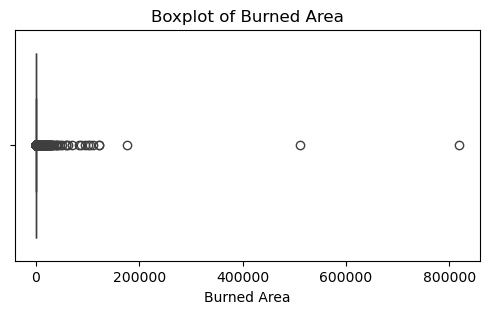

In [35]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df_new['Burned Area'])
plt.title('Boxplot of Burned Area')

In [36]:
def calculate_severity(row):
    if row['Burned Area'] < df_new['Burned Area'].quantile(0.3):
        return 'Minor'
    elif row['Burned Area'] > df_new['Burned Area'].quantile(0.7):
        return 'Major'
    else:
        return 'Medium'

df_new['Severity'] = df_new.apply(calculate_severity, axis=1)

### Encoding non-numerical features

Beforing encoding the column 'Region', the values need to be assigned to a more universal classification of regions in Greece.

In [37]:
county_to_region_mapping = {
    # Aegean
    'ΛΕΣΒΟΥ': 'Aegean',
    'ΧΙΟΥ': 'Aegean',
    'ΣΑΜΟΥ': 'Aegean',
    'ΚΥΚΛΑΔΩΝ': 'Aegean',
    'ΔΩΔΕΚΑΝΗΣΩΝ': 'Aegean',

    # Attica
    'ΑΤΤΙΚΗΣ': 'Attica',

    # Crete
    'ΗΡΑΚΛΕΙΟΥ': 'Crete',
    'ΧΑΝΙΩΝ': 'Crete',
    'ΡΕΘΥΜΝΟΥ': 'Crete',
    'ΛΑΣΙΘΙΟΥ': 'Crete',

    # Epirus and Western Macedonia
    'ΙΩΑΝΝΙΝΩΝ': 'EpirusandWesternMacedonia',
    'ΘΕΣΠΡΩΤΙΑΣ': 'EpirusandWesternMacedonia',
    'ΑΡΤΑΣ': 'EpirusandWesternMacedonia',
    'ΠΡΕΒΕΖΗΣ': 'EpirusandWesternMacedonia',
    'ΚΟΖΑΝΗΣ': 'EpirusandWesternMacedonia',
    'ΦΛΩΡΙΝΑΣ': 'EpirusandWesternMacedonia',
    'ΚΑΣΤΟΡΙΑΣ': 'EpirusandWesternMacedonia',
    'ΓΡΕΒΕΝΩΝ': 'EpirusandWesternMacedonia',

    # Macedonia and Thrace
    'ΘΕΣΣΑΛΟΝΙΚΗΣ': 'MacedoniaandThrace',
    'ΣΕΡΡΩΝ': 'MacedoniaandThrace',
    'ΧΑΛΚΙΔΙΚΗΣ': 'MacedoniaandThrace',
    'ΚΙΛΚΙΣ': 'MacedoniaandThrace',
    'ΠΕΛΛΑΣ': 'MacedoniaandThrace',
    'ΗΜΑΘΙΑΣ': 'MacedoniaandThrace',
    'ΠΙΕΡΙΑΣ': 'MacedoniaandThrace',
    'ΡΟΔΟΠΗΣ': 'MacedoniaandThrace',
    'ΚΑΒΑΛΑΣ': 'MacedoniaandThrace',
    'ΔΡΑΜΑΣ': 'MacedoniaandThrace',
    'ΞΑΝΘΗΣ': 'MacedoniaandThrace',
    'ΕΒΡΟΥ': 'MacedoniaandThrace',

    # Peloponnese, Western Greece and
    'ΑΡΚΑΔΙΑΣ': 'Peloponnese,WesternGreeceand',
    'ΜΕΣΣΗΝΙΑΣ': 'Peloponnese,WesternGreeceand',
    'ΛΑΚΩΝΙΑΣ': 'Peloponnese,WesternGreeceand',
    'ΑΡΓΟΛΙΔΟΣ': 'Peloponnese,WesternGreeceand',
    'ΚΟΡΙΝΘΙΑΣ': 'Peloponnese,WesternGreeceand',
    'ΑΧΑΙΑΣ': 'Peloponnese,WesternGreeceand',
    'ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ': 'Peloponnese,WesternGreeceand',
    'ΗΛΕΙΑΣ': 'Peloponnese,WesternGreeceand',
    'ΚΕΡΚΥΡΑΣ': 'Peloponnese,WesternGreeceand',
    'ΛΕΥΚΑΔΟΣ': 'Peloponnese,WesternGreeceand',
    'ΚΕΦΑΛΛΟΝΙΑΣ': 'Peloponnese,WesternGreeceand',
    'ΖΑΚΥΝΘΟΥ': 'Peloponnese,WesternGreeceand',

    # Thessaly and Central Greece
    'ΛΑΡΙΣΑΣ': 'ThessalyandCentralGreece',
    'ΜΑΓΝΗΣΙΑΣ': 'ThessalyandCentralGreece',
    'ΤΡΙΚΑΛΩΝ': 'ThessalyandCentralGreece',
    'ΚΑΡΔΙΤΣΑΣ': 'ThessalyandCentralGreece',
    'ΦΘΙΩΤΙΔΑΣ': 'ThessalyandCentralGreece',
    'ΕΥΡΥΤΑΝΙΑΣ': 'ThessalyandCentralGreece',
    'ΦΩΚΙΔΟΣ': 'ThessalyandCentralGreece',
    'ΒΟΙΩΤΙΑΣ': 'ThessalyandCentralGreece',
    'ΕΥΒΟΙΑΣ': 'ThessalyandCentralGreece',
}

In [38]:
df_encoded = df_new.copy()

df_encoded['Region'] = df_encoded['Region'].replace(county_to_region_mapping)

# encode Region
region_encoding = {region: idx for idx, region in enumerate(df_encoded['Region'].unique())}
df_encoded['Region'] = df_encoded['Region'].map(region_encoding)
print("Region Encoding:", region_encoding)

Region Encoding: {'Attica': 0, 'MacedoniaandThrace': 1, 'EpirusandWesternMacedonia': 2, 'ThessalyandCentralGreece': 3, 'Peloponnese,WesternGreeceand': 4, 'Aegean': 5, 'Crete': 6}


In [39]:
# encode Severity
severity_encoding = {'Minor': 0, 'Medium': 1, 'Major': 2}
df_encoded['Severity'] = df_encoded['Severity'].map(severity_encoding)

### Selecting the target variables

In [40]:
# check how many rows have value different than 0 in the columns Machinery, Aircraft CL415, Aircraft CL215, Aircraft PZL, Aircraft GRU, Helicopters, Water Tankers, Fire Trucks, Municipal Vehicles
print(df_encoded[df_encoded['Machinery'] != 0].shape[0])
print(df_encoded[df_encoded['Aircraft CL415'] != 0].shape[0])
print(df_encoded[df_encoded['Aircraft CL215'] != 0].shape[0])
print(df_encoded[df_encoded['Aircraft PZL'] != 0].shape[0])
print(df_encoded[df_encoded['Aircraft GRU'] != 0].shape[0])
print(df_encoded[df_encoded['Helicopters'] != 0].shape[0])
print(df_encoded[df_encoded['Water Tankers'] != 0].shape[0])
print(df_encoded[df_encoded['Fire Trucks'] != 0].shape[0])
print(df_encoded[df_encoded['Municipal Vehicles'] != 0].shape[0])
print(df_encoded[df_encoded['Firefighting Personnel'] != 0].shape[0])

2640
775
822
1638
17
1560
3904
108134
3889
108876


Based on the statistics directly above only 'Fire Trucks' and 'Firefighting Personnel' will be selected as target variables. Other features have too few non-zero values.

### Dropping unncessary columns

In [41]:
df_drop = df_encoded.copy()

df_drop.drop(columns=['Burned Area'], inplace=True)
df_drop.drop(columns=['Start Date', 'Start Time'], inplace=True)
df_drop.drop(columns=['Machinery', 'Aircraft CL415', 'Aircraft CL215', 'Aircraft PZL', 'Aircraft GRU', 'Helicopters', 'Water Tankers', 'Municipal Vehicles'], inplace=True)
df_drop.drop(columns=['Service', 'Municipality', 'Address'], inplace=True)

In [42]:
df_drop.reset_index(drop=True, inplace=True)

In [44]:
df_drop.to_csv('../../data/resources/Greece_wildfire_resources_2013_2024.csv', index=False)

In [45]:
df_drop

,Region,Fire Trucks,Firefighting Personnel,Year,Month,Day of the Week,Severity
0,0,8.0,35.0,0,4,0,2
1,0,3.0,12.0,0,4,1,0
2,0,5.0,13.0,0,5,4,1
3,0,2.0,9.0,0,5,4,1
4,0,5.0,13.0,0,6,0,2
...,...,...,...,...,...,...,...
112317,4,3.0,6.0,11,10,0,0
112318,4,10.0,20.0,11,10,5,1
112319,4,1.0,2.0,11,11,5,0
112320,4,1.0,2.0,11,2,3,0


## CONCLUSIONS

The raw data consisted of up to 38 columns and seemed to give detailed information about the wildfires and the resources utilized. However during the process of cleaning and preparing the data for further modelling following conclusions have been reached:

- several columns were not consistent throughout all the concatenated datasets, therefore had to be dropped
- many columns had very few non-zero values, therefore were also dropped
- even though some features could be informative they cannot be applied as the the model trained on this data will only have specific input variables that are determined by the fire prediction model
- choosing the correct thresholds for the 'Severity' column requires further research, so the current results might be skewed